<a href="https://colab.research.google.com/github/zeynab1013/Coupled-Power-Law-Dark-Energy-and-Dark-Matter-Model/blob/main/fig_5_joachim_paper_kids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install virtualenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 14.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount("/content/drive")
!virtualenv /content/drive/MyDrive/colab_env
!source /content/drive/MyDrive/colab_env/bin/activate;
import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

Mounted at /content/drive
created virtual environment CPython3.10.12.final.0-64 in 29560ms
  creator CPython3Posix(dest=/content/drive/MyDrive/colab_env, clear=False, no_vcs_ignore=False, global=False)
  seeder FromAppData(download=False, pip=bundle, setuptools=bundle, wheel=bundle, via=copy, app_data_dir=/root/.local/share/virtualenv)
    added seed packages: GetDist==1.4.3, Pillow==10.0.0, PyYAML==6.0.1, Py_BOBYQA==1.4, Pygments==2.16.1, astropy==5.3.2, cached_property==1.5.2, camb==1.5.0, certifi==2023.7.22, charset_normalizer==3.2.0, click==8.1.7, cobaya==3.3.2, contourpy==1.1.0, cycler==0.11.0, deprecation==2.1.0, dill==0.3.7, fonttools==4.42.1, fuzzywuzzy==0.18.0, hmf==3.4.4, idna==3.4, kiwisolver==1.4.5, markdown_it_py==3.0.0, matplotlib==3.7.2, mdurl==0.1.2, mpmath==1.3.0, numpy==1.25.2, packaging==23.1, pandas==2.1.0, pip==24.3.1, portalocker==2.7.0, pyerfa==2.0.0.3, pyparsing==3.0.9, python_dateutil==2.8.2, pytz==2023.3.post1, requests==2.31.0, rich==13.5.2, scipy==1.11.2, se

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel, Matern, RationalQuadratic, DotProduct, WhiteKernel, ExpSineSquared

import matplotlib as mpl
#mpl.rcParams['figure.dpi'] = 300
from matplotlib import colors
from matplotlib import colormaps as cm

#plt.style.use('classic')
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

In [4]:
path1 = '/content/drive/MyDrive/colab_env/ForElena/'

In [5]:
cosmo_param=np.loadtxt(path1+'cosmo/cosmoSLICS_Cosmologies_Omm_S8_h_w0_sigma8.dat') ## cosmological parameters
np.shape(cosmo_param)

(26, 5)

In [6]:
Om=cosmo_param[:,0]
S8=cosmo_param[:,1]
h0=cosmo_param[:,2]
w0=cosmo_param[:,3]
sigma8=cosmo_param[:,4]

np.shape(cosmo_param[:,:4])

(26, 4)

# **Cov Mat**

Text(0.5, 1.0, 'kids cov matrix')

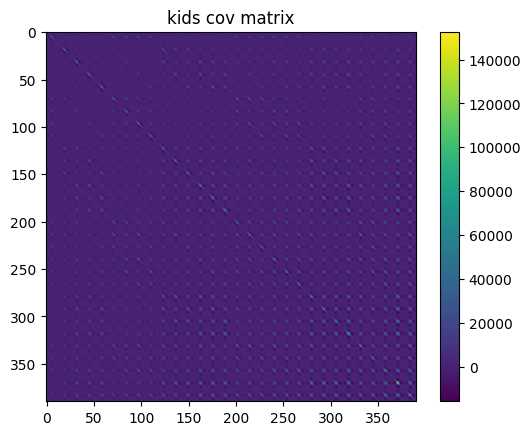

In [7]:
import gzip, pickle

covm=np.loadtxt(path1+'SNR_12.5_FullData_cov_mask_KiDS1000.dat') ## cosmological parameters
plt.imshow(covm)
plt.colorbar()
#plt.xlabel('k',fontsize=18)
plt.title('kids cov matrix')



In [ ]:
np.shape(covm)

(390, 390)

# I want to iterate over all 30 tomographic bins

In [8]:
snr=np.loadtxt(path1+'training/signal/SNR_bins.dat')

#different cosmologies
X_LCDM=cosmo_param[-1, :4] #cosmological pars for LCDM
X_LCDM = np.expand_dims(X_LCDM, axis=0) ## needed for the GP emulator from sklearn
X_LCDM_out = cosmo_param[:-1, :4]
#print(np.shape(X_LCDM_out))

err=[np.loadtxt(path1+'training/error/Data_Err_12.5_tomo'+str(i)+'_74-199.dat')for i in range(1,31)]
train_err=np.array(err)

# Pre-load data into a dictionary
data_dict = {}
for j in range(1, 31):
    data_dict[j] = [np.loadtxt(path1 + 'training/signal/Data_' + str(i) + '_12.5_tomo' + str(j) + '.dat')[:, 1] for i in range(26)]
    data_dict[j] = np.array(data_dict[j])

In [31]:
kernel = ConstantKernel(1, (1e-3, 1e3)) * RBF()

gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, normalize_y=True)

def ypred_func(om, s8, h0, w0):
    return gp.predict(np.array([[om, s8, h0, w0]])).ravel()


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarni

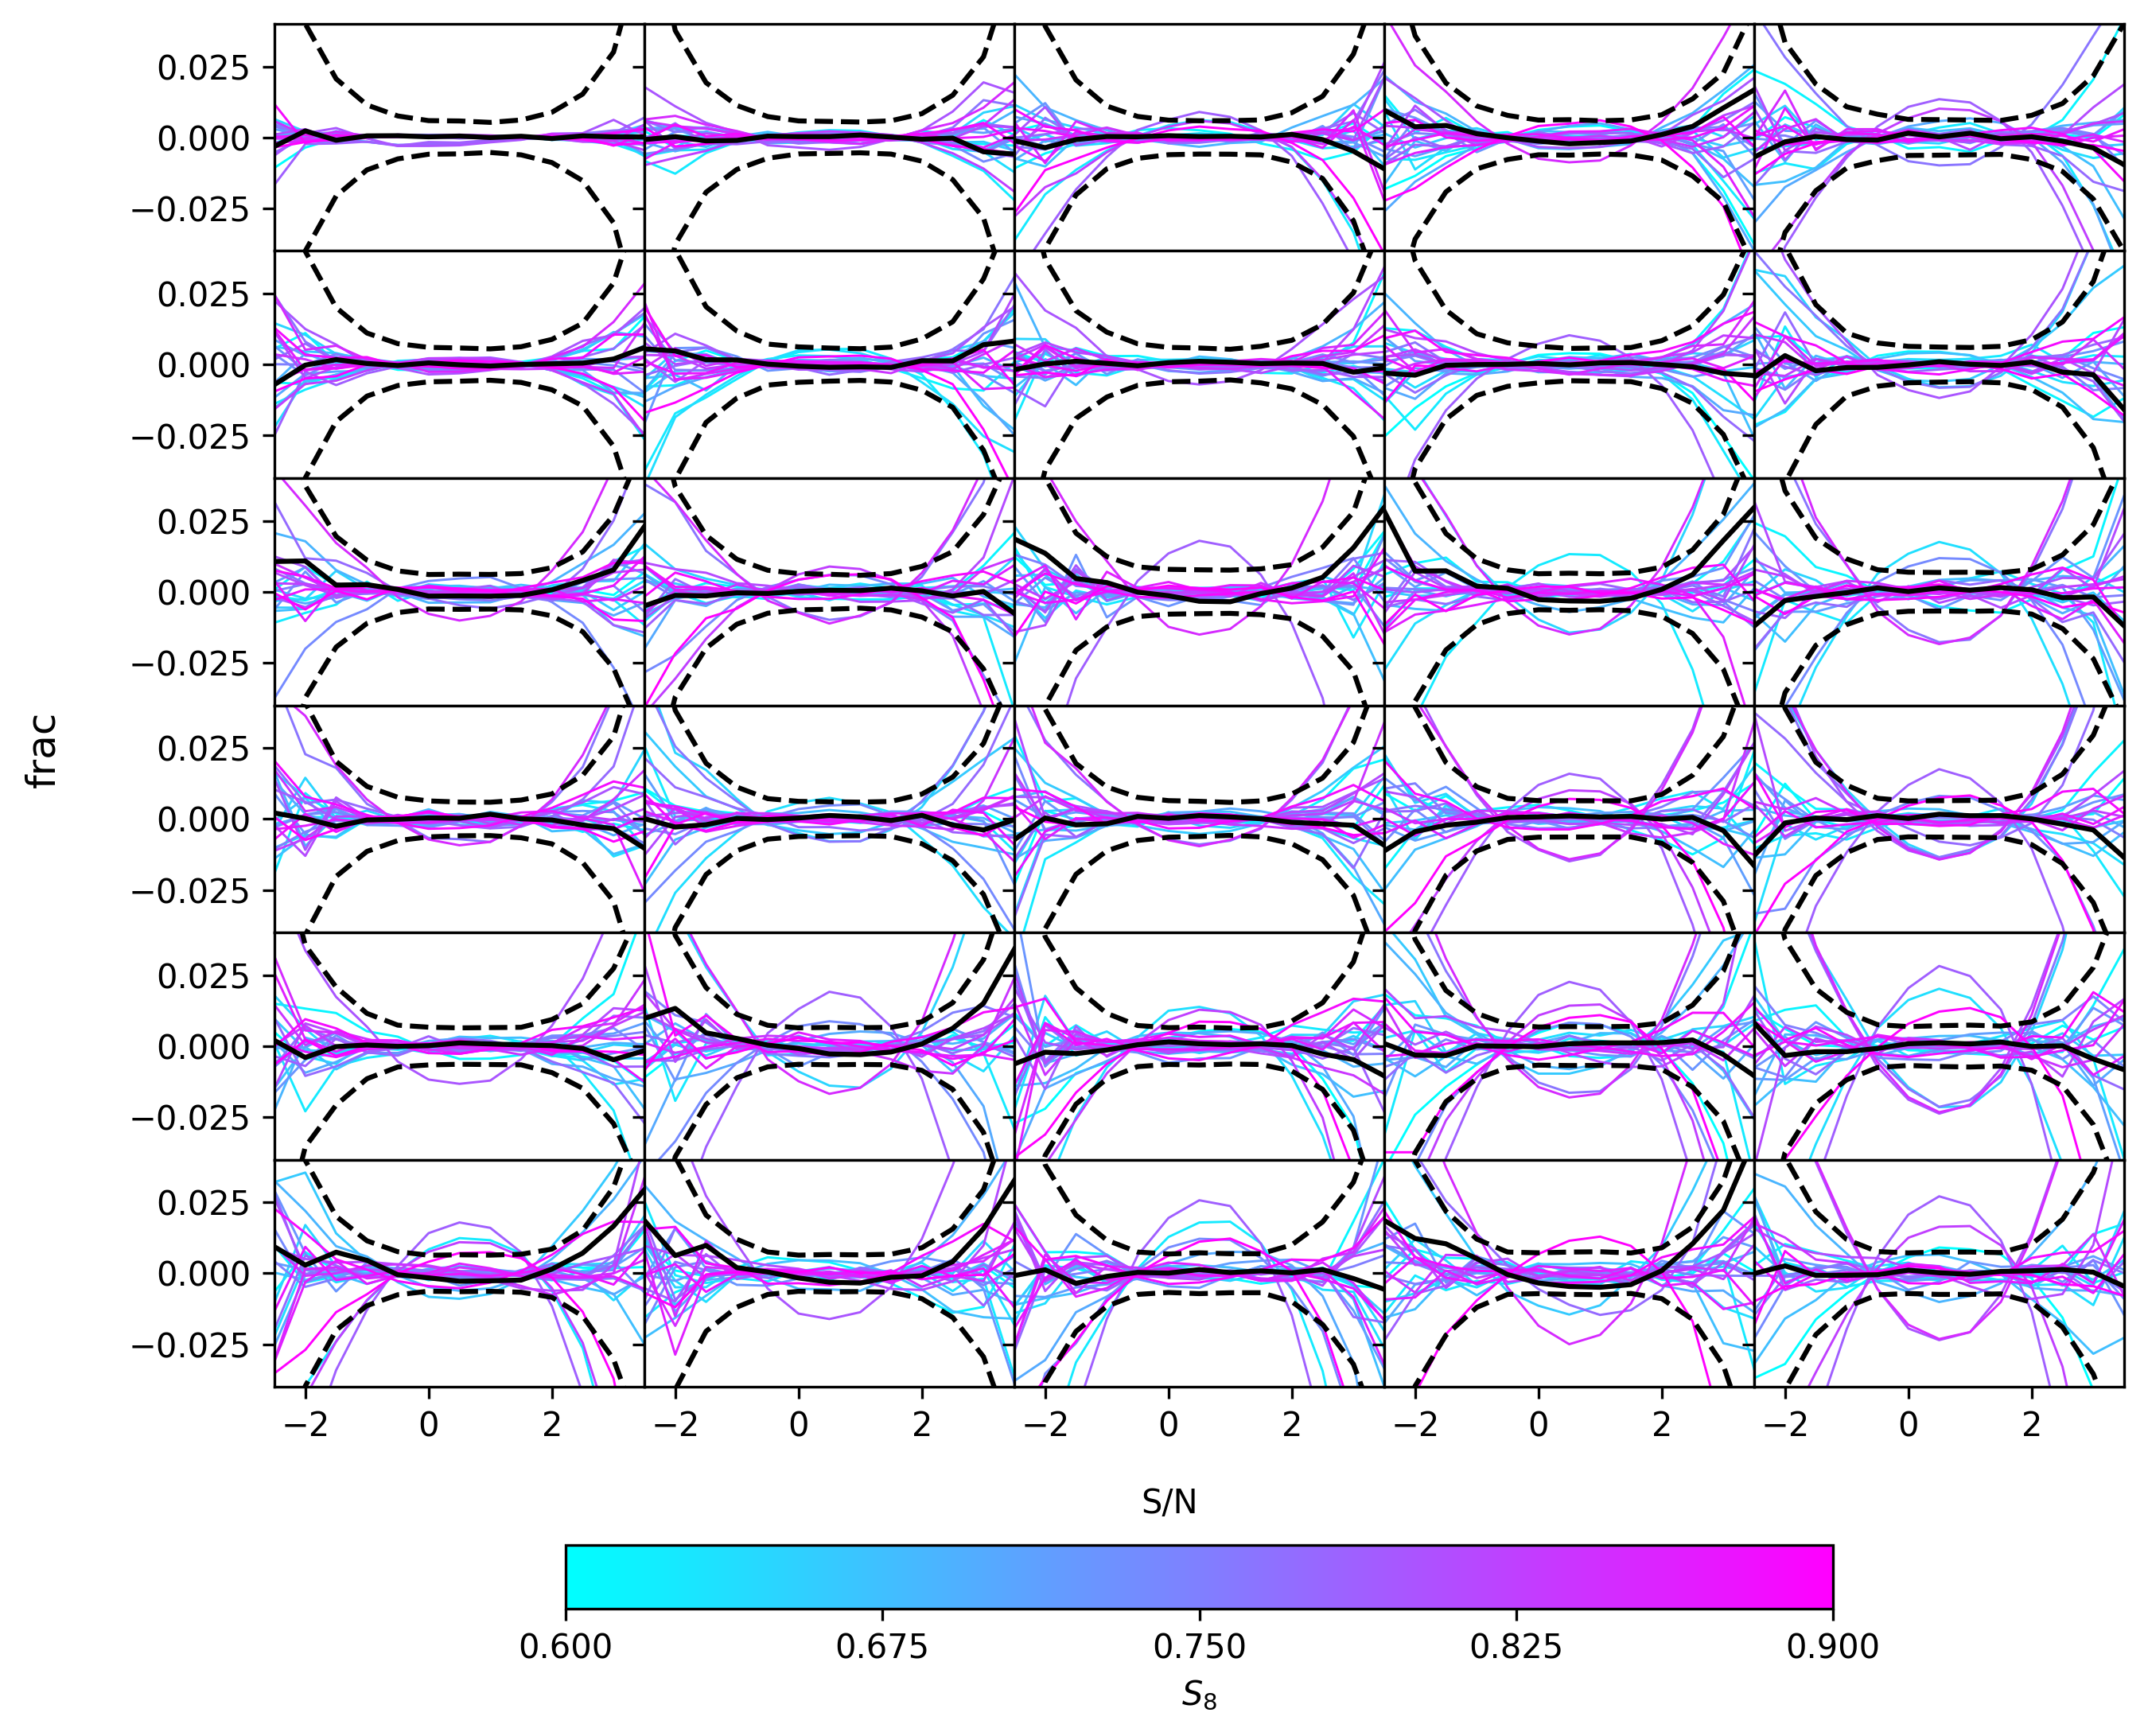

In [32]:
#plot initializer
fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(10, 8), sharex='col', sharey='row', gridspec_kw={'hspace': 0, 'wspace': 0, 'bottom': 0.05}, dpi=300)
n_lines = 25
cmap = mpl.colormaps['cool']

#Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

for i in range(25):
    X_model_i = cosmo_param[i,:4]
    X_model_i = np.expand_dims(X_model_i, axis=0)
    X_model_i_out =  np.delete(cosmo_param[:,:4], i, axis=0)

    frac_err = np.zeros((30,13))

    for j in range(1,31):
        Ytrain = data_dict[j]
        #print(np.shape(Ytrain))
        Y_model_i = Ytrain[i]
        Y_model_i = np.expand_dims(Y_model_i, axis=0)
        #gp.fit(cosmo_param[:,:4], Ytrain)
        #Ypred_model_i = gp.predict(X_model_i).ravel() #.ravel() takes all the elements of the array, regardless of their original dimensions, and puts them into a single, long sequence.
        Y_model_i_out_train = np.delete(Ytrain, i, axis=0)
        gp.fit(X_model_i_out, Y_model_i_out_train)
        frac = 1-ypred_func(X_model_i[0][0], X_model_i[0][1], X_model_i[0][2], X_model_i[0][3])/Y_model_i
        frac_err[j-1] = frac
        ax = fig.get_axes()[j-1]  # Access Axes object by index
        ax.plot(snr, frac_err[j-1], color = colors[i,:], linewidth = 0.7) #plot on correct Axes object
        ax.set_xlim(-2.5, 3.5)
        ax.set_ylim(-0.04, 0.04)

frac_err = np.zeros((30,13))

# Now iterate over the  using the pre-loaded data
for j in range(1, 31):
    Ytrain = data_dict[j]
    #print(np.shape(Ytrain))
    Y_LCDM = Ytrain[-1]
    Y_LCDM = np.expand_dims(Y_LCDM, axis=0)
    #print(np.shape(Y_LCDM))
    #gp.fit(cosmo_param[:,:4], Ytrain)
    #Ypred_LCDM = gp.predict(X_LCDM).ravel() #.ravel() takes all the elements of the array, regardless of their original dimensions, and puts them into a single, long sequence.

    Y_LCDM_out_train = Ytrain[:-1]
    gp.fit(X_LCDM_out, Y_LCDM_out_train)
    frac = 1-ypred_func(X_LCDM[0][0], X_LCDM[0][1], X_LCDM[0][2], X_LCDM[0][3])/Y_LCDM
    frac_err[j-1] = frac
    ax = fig.get_axes()[j-1]  # Access Axes object by index
    ax.plot(snr, frac_err[j-1], color = 'black') #plot on correct Axes object
    Y_LCDM = Ytrain[-1] #dimension should be reduced again
    ax.plot(snr, (train_err[j-1])/Y_LCDM, '--', color = 'black')
    ax.plot(snr, -(train_err[j-1])/Y_LCDM, '--', color = 'black')
    ax.set_xlim(-2.5, 3.5)
    ax.set_ylim(-0.04, 0.04)

fig.text(0.5, 0.1, 'S/N', ha='center')
#fig.text(0.04, 0.5, 'S/N', va='center', rotation='vertical')


cbar = fig.colorbar(
    mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0.6, 0.9), cmap=cmap),
    ax=axs,
    orientation='horizontal',
    location='bottom',  # Position the colorbar at the bottom of the grid
    fraction=0.04,  # Fraction of the original axes size for the colorbar
    pad=0.1,  # Padding between the plots and the colorbar
    label='$S_8$',
    ticks=np.linspace(0.6, 0.9, num=5)
)

#plt.ylabel(r'$frac$')#, fontsize=14)
#plt.xlabel(r'$S/N$')#, fontsize=14)
#plt.xticks(fontsize=13)
#plt.yticks(fontsize=13)

#fig.supxlabel('S/N')
fig.supylabel('frac')

for ax in fig.get_axes():
    ax.label_outer()

plt.show()

# **MCMC**

In [ ]:
import sys, platform, os
try:
    from cobaya.run import run
except ImportError:
    sys.path.insert(0,'../../cobaya')
    from cobaya.run import run

In [ ]:
def mu(om, s8, h0, w0):
    return np.array([Ytrue - ypred_func(om, s8, h0, w0)])

def mut(om, s8, h0, w0):
    return np.reshape(mu(om, s8, h0, w0),(len(snr),1))

def chi2(om, s8, h0, w0, c):
    cinv = np.linalg.inv(c)
    return np.matmul(mu(om, s8, h0, w0),np.matmul(cinv,mut(om, s8, h0, w0)))

def modloglike(om, s8, h0, w0, c):
    return -0.5 * chi2(om, s8, h0, w0, c)

def my_like(om, s8, h0, w0):
    return modloglike(om, s8, h0, w0, covm)

In [ ]:
info = {"likelihood": {"external": my_like},
        "params"    : {
            "om": {"prior": {"min": 0.1  , "max": 0.55},"ref": 0.3 ,"latex": r"\Omega_m"},
            "s8"   : {"prior": {"min": 0.6 , "max": 0.9},"ref": 0.727 ,"latex": r"S_8"},
            "h0"    : {"prior": {"min": 0.6  , "max": 0.82},"ref": 0.68 ,"latex": r"h"},
            "w0": {"prior": {"min": -2.0  , "max": -0.5},"ref": -1.05 ,"latex": r"w_0"},
            #"sig8"  : {"derived": lambda om, s8: s8/((om/0.3)**0.5),"latex": r"\sigma_8"}
                        },
        "sampler": {"mcmc": {"Rminus1_stop": 0.01, "max_tries": 100000}},
        "output":"kidsdata-peakcounts",
        "force":"True"
        }

In [ ]:
from cobaya.run import run
updated_info, sampler = run(info)

In [ ]:
# Export the direct results to GetDist
from getdist.mcsamples import MCSamplesFromCobaya
import getdist.plots as gdplt

gd_samples = MCSamplesFromCobaya(updated_info, sampler.products()["sample"])
gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_samples, ["om","s8","h0","w0"], filled=True)
gdplot.export("/content/drive/MyDrive/colab_env/ForElena/kids-posterior.pdf")

In [ ]:
print(gd_samples.getTable().tableTex())

#**Cov Mat cross-correlation coefficient matrix - Fig. 4**

## **Order of the tomo bins: 1, 2, 3, 4, 5, 1and2, 1and3, 1and4, 1and5, 2and3, ....**

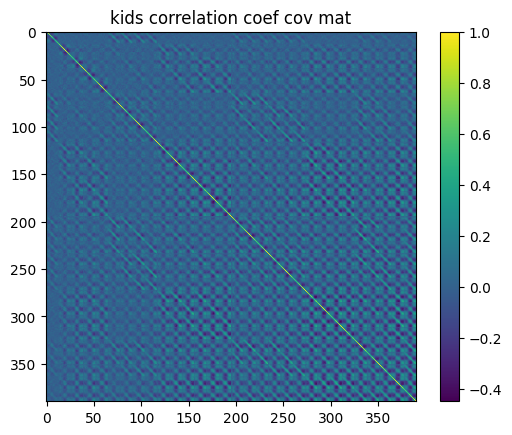

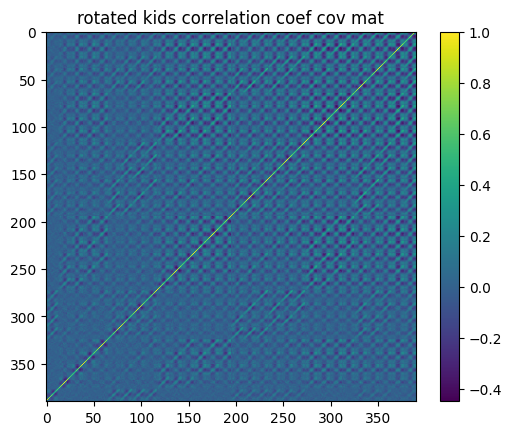

In [29]:
corr_covm=np.zeros((390,390))

for i in range(390):
  for j in range(390):
    corr_covm[i,j]=covm[i,j]/(np.sqrt(covm[i,i])*np.sqrt(covm[j,j]))

rotated_corr_covm = np.rot90(corr_covm, 1)  # Rotate by 90 degrees (1 * 90) ***counterclockwise***


fig, ax = plt.subplots()
im = ax.imshow(corr_covm)
fig.colorbar(im, ax=ax)
#plt.xlabel('k',fontsize=18)
ax.set_title('kids correlation coef cov mat')


# For the second plot, create a new figure and axes
fig2, ax2 = plt.subplots()
im2 = ax2.imshow(rotated_corr_covm)
fig2.colorbar(im2, ax=ax2)
#plt.xlabel('k',fontsize=18)
ax2.set_title('rotated kids correlation coef cov mat')

plt.show()